# HW2Q7 a,b 
##### normalizing before doing power of n's
### import library

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

### constants

In [10]:
EPSILON = 0.01
MAX_ITER = 1000000
RHO = 0.01

### functions

In [11]:
def phi_func(row, n_degree):
    if n_degree == -1:
        return row
    else:
        result = np.array([])
        for i in row:
            for j in range(1, n_degree + 1):
                result = np.concatenate([result, [np.power(i, j)]])
        return np.concatenate([result, [1]])


def feature_normalization(data):
    data_copy = data.copy()
    trn = data_copy['X_trn']
    tst = data_copy['X_tst']
    val = data_copy['X_val']
    for i in range(0, len(trn[0])):
        avg = np.mean(trn[:, i])
        max_minus_min = np.max(trn[:, [i]]) - np.min(trn[:, [i]])
        trn[:, [i]] = (trn[:, [i]] - avg) / max_minus_min
        tst[:, [i]] = (tst[:, [i]] - avg) / max_minus_min
        val[:, [i]] = (val[:, [i]] - avg) / max_minus_min
    data_copy['X_trn'] = trn
    data_copy['X_tst'] = tst
    data_copy['X_val'] = val
    return data_copy


def linear_reg(data, s, n_degree=-1, gd_rho=RHO):
    data_copy = data.copy()
    for key in ['X_trn', 'X_tst', 'X_val']:
        data_copy[key] = np.apply_along_axis(phi_func, 1, data_copy[key], n_degree)
    # start regression:
    if s == 0:
        return (data_copy,) + closed_form_reg(data_copy)
    elif s == 1:
        return (data_copy,) + gradient_descent_reg(data_copy, rho=gd_rho)


def closed_form_reg(data):
    theta_star = closed_form_theta(data)
    err_trn, err_tst, err_val = calc_error(data, theta_star)
    return theta_star, err_trn, err_tst, err_val


def closed_form_theta(data):
    x_trn = data['X_trn']
    y_trn = data['Y_trn']
    inv = np.linalg.inv(np.matmul(x_trn.transpose(), x_trn))
    theta_star_mat = np.matmul(inv, np.matmul(x_trn.transpose(), y_trn))
    return theta_star_mat


def calc_error(data, theta):
    x_train = data['X_trn']
    x_test = data['X_tst']
    x_val = data['X_val']
    y_train = data['Y_trn']
    y_test = data['Y_tst']
    y_val = data['Y_val']
    err_train = calc_error_xytheta(x_train, y_train, theta)
    err_test = calc_error_xytheta(x_test, y_test, theta)
    err_val = calc_error_xytheta(x_val, y_val, theta)
    return err_train, err_test, err_val


def calc_error_xytheta(x_mat, y_mat, theta_mat):
    err_mat = np.subtract(y_mat, np.matmul(theta_mat.transpose(), x_mat.transpose()).transpose())
    err = np.power(np.linalg.norm(err_mat), 2) / len(err_mat)
    return err


def gradient_descent_reg(data, max_iter=MAX_ITER, rho=RHO, epsilon=EPSILON):
    x_train = data['X_trn']
    y_train = data['Y_trn']
    curr_theta = np.full((len(x_train[0]), 1), 0)
    i = 1
    for i in range(0, max_iter):
        new_theta, new_dir = single_descent(curr_theta, rho, x_train, y_train)
        curr_theta = new_theta
        if np.linalg.norm(new_dir) < epsilon:
            print("The total number of iterations is: {} with rho = {}".format(i + 1, rho))
            break
    if i >= max_iter - 1:
        print("Exceeds max iteration: {}; with learning rate: {}".format(max_iter, rho))
    err_trn, err_tst, err_val = calc_error(data, curr_theta)
    return curr_theta, err_trn, err_tst, err_val


def single_descent(curr_theta, rho, x, y):
    xt_x = np.matmul(x.transpose(), x)
    xt_y = np.matmul(x.transpose(), y)
    new_dir = (np.matmul(xt_x, curr_theta) - xt_y)
    theta = curr_theta - new_dir * rho
    return theta, new_dir


def plot_regression(data, theta, title=""):
    # plot scatter point from data set
    x = data['x']
    y = data['y']
    x_first_col = x[:, [0]]
    plt.scatter(x_first_col, y)
    # plot line generated from theta
    theta_x = np.array([np.arange(-0.6, 0.6, 0.01)]).transpose()
    expanded_x = np.apply_along_axis(phi_func, 1, theta_x, len(theta) - 1)
    theta_y = np.matmul(expanded_x, theta)
    plt.plot(list(theta_x), list(theta_y))
    plt.title(title + " n = {}".format(theta.shape[0] - 1))
    plt.show()

### calculating the optimal theta from n = 1 to n = 9

Here, I am normalizing my original data before I do trainings.

First I do feature normalization to the original data where: x_i' = (x_i - mean(x_i))/(max(x_i) - min(x_i))

Then, in each training, I apply phi-function to each row where I generate [x^1, x^2, ... ,x^n 1]

Since the generated squares won't be very big since they are genrated from values with absolute value less than 1.

To conclude: normalize the data -> calculate the powers -> training -> result

**When I am drawing according to theta, I sample from -1 to 1 which gives me some vector like [-1, -0.98, -0/96, ... , 0.98, 1]^T**
Then I apply the phi-function to each row which gives me back something like A =:

| -1  | (-1)^2| (-1)^3  |  ... | (-1)^n | 1 |
|---|---|---|---|---|---|
| -0.98  | (-0.98)^2| (-0.98)^3  |  ... | (-0.98)^n | 1 |
| ...  | ...  | ...  | ...  | ...  | ... |
| -0.98  | (-0.98)^2| (-0.98)^3  |  ... | (-0.98)^n | 1 |
| 1  | (1)^2| (1)^3  |  ... | (1)^n | 1 |

Then I apply this matrix to theta (A theta) which gives back me y's value and then I plot it.

This version has better result and plotting but is the method I took is **different from what we were told in class**.

n = 1
closed form calculation:
theta transpose = 
 [[-4.11006944 -0.69675023]]
training error: 1.4305736953400872
testing error: 1.4514033919440033
validation error: 1.7176746552258777
gradient descent calculation:


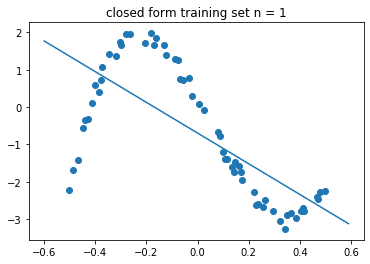

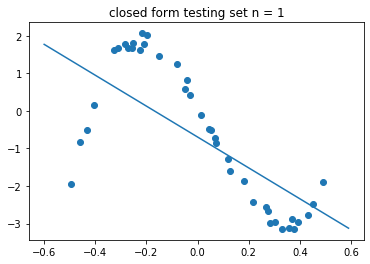

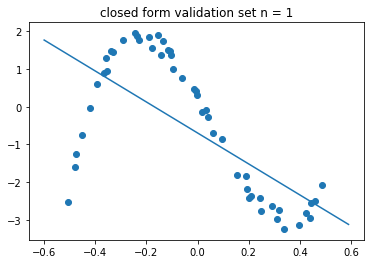

The total number of iterations is: 140 with rho = 0.01
theta transpose = 
 [[-4.10834483 -0.69675023]]
training error: 1.43057396317176
testing error: 1.4516595081929249
validation error: 1.717741247295772


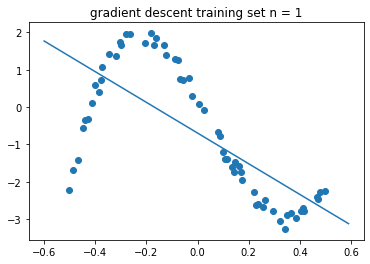

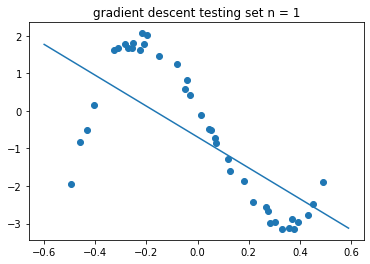

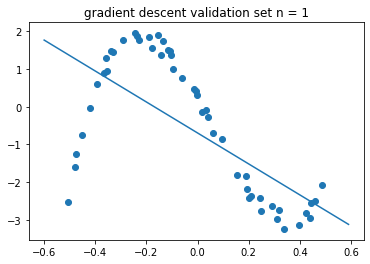

n = 2
closed form calculation:
theta transpose = 
 [[-4.27294996 -8.70952083  0.08753994]]
training error: 0.9647870552848652
testing error: 0.9601115714572043
validation error: 1.0022413445387786
gradient descent calculation:


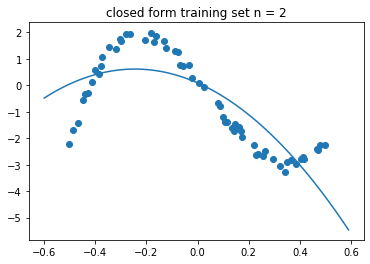

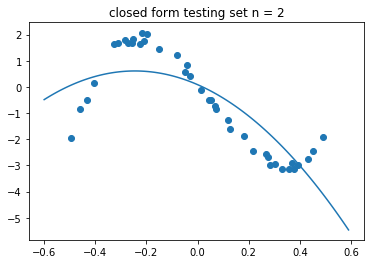

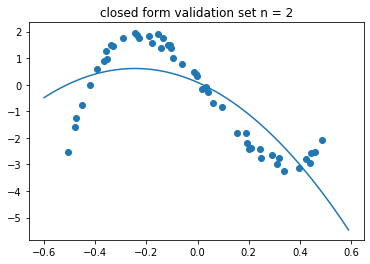

The total number of iterations is: 1578 with rho = 0.01
theta transpose = 
 [[-4.27240659 -8.68243056  0.08508552]]
training error: 0.9647915619822612
testing error: 0.9603940634180272
validation error: 1.0030499187781572


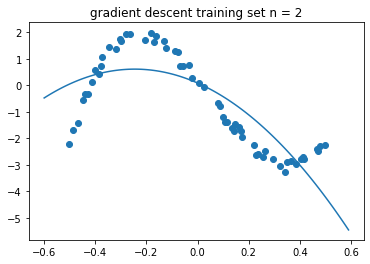

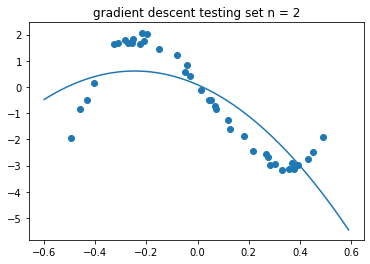

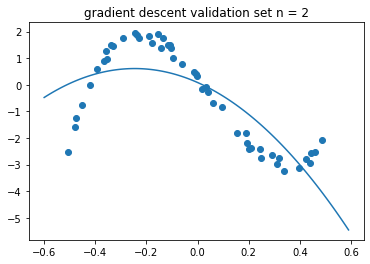

n = 3
closed form calculation:
theta transpose = 
 [[-12.09961799  -9.16595802  49.29814825   0.211663  ]]
training error: 0.02139398288216852
testing error: 0.020783357374308593
validation error: 0.02019578093961827
gradient descent calculation:


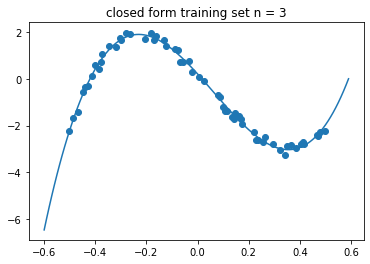

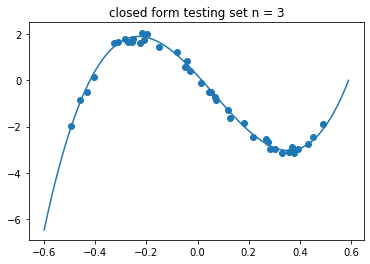

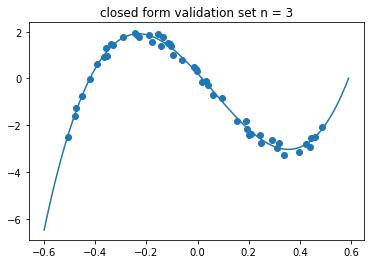

The total number of iterations is: 20894 with rho = 0.01
theta transpose = 
 [[-12.03032807  -9.16157839  48.86358578   0.21053636]]
training error: 0.021467296688919963
testing error: 0.020851129081023954
validation error: 0.020252209678880844


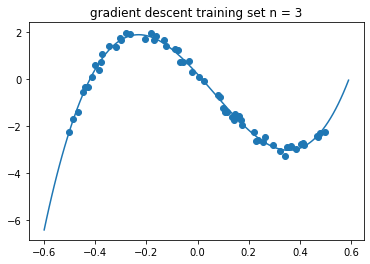

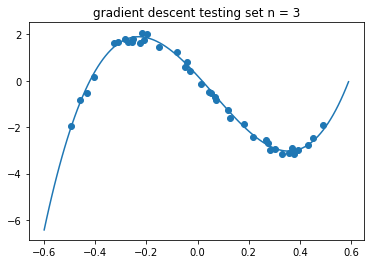

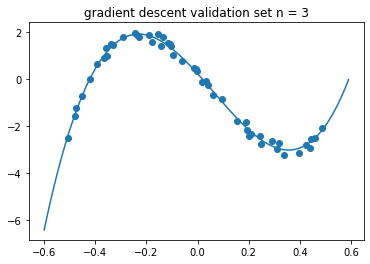

n = 4
closed form calculation:
theta transpose = 
 [[-12.09864017  -7.84453189  49.2970257   -5.95059432   0.17764673]]
training error: 0.02049553558581841
testing error: 0.02222499913120119
validation error: 0.02147663076681846
gradient descent calculation:


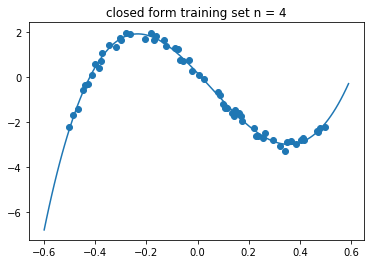

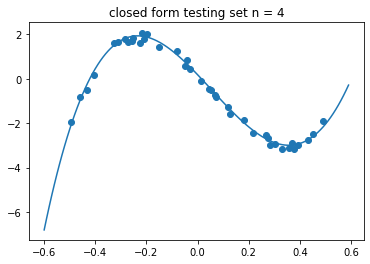

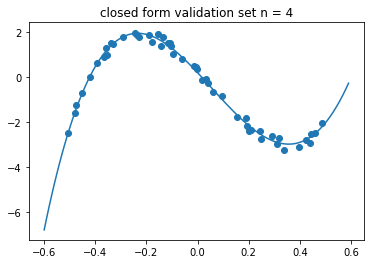

The total number of iterations is: 21353 with rho = 0.01
theta transpose = 
 [[-12.03681759  -8.49232883  48.90653229  -3.02735433   0.19357666]]
training error: 0.020771752764097554
testing error: 0.021342394501755575
validation error: 0.020634172714513243


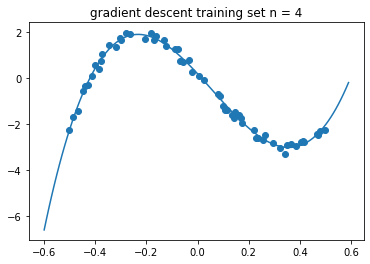

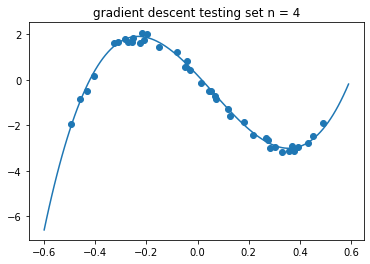

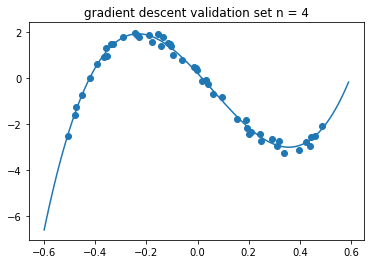

n = 5
closed form calculation:
theta transpose = 
 [[-12.50317919  -7.79126625  56.52276593  -6.24510929 -25.13927513
    0.18012754]]
training error: 0.019345448917303516
testing error: 0.023977377951281457
validation error: 0.022931325482111863
gradient descent calculation:


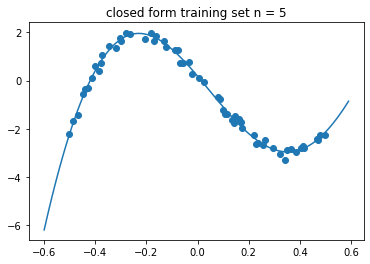

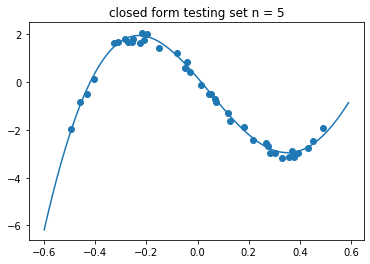

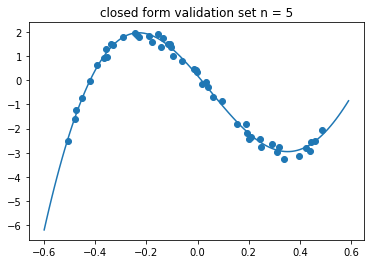

The total number of iterations is: 20287 with rho = 0.01
theta transpose = 
 [[-11.8369607   -8.50379208  45.33065726  -2.94859368  12.45247323
    0.19196835]]
training error: 0.02218245388350598
testing error: 0.02128652110444643
validation error: 0.02058448215552022


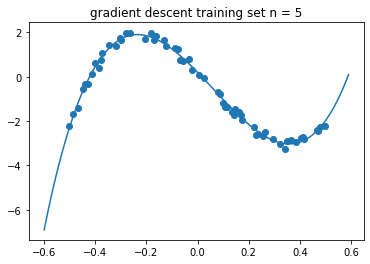

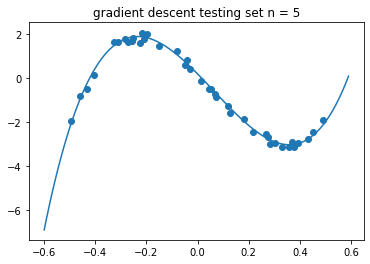

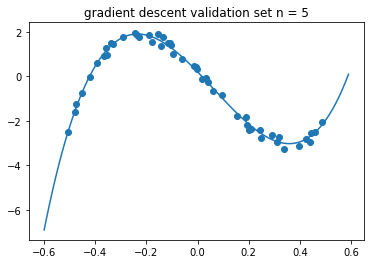

n = 6
closed form calculation:
theta transpose = 
 [[-12.50059996  -8.23141692  56.52732454  -1.30906429 -25.21417421
  -13.74086061   0.18575274]]
training error: 0.01932643650789501
testing error: 0.02408124045488295
validation error: 0.02286548004923214
gradient descent calculation:


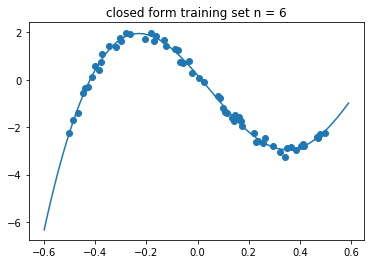

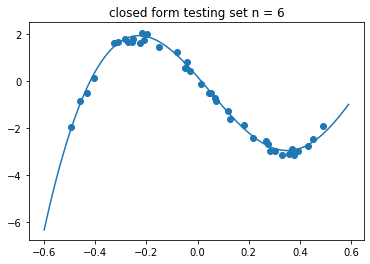

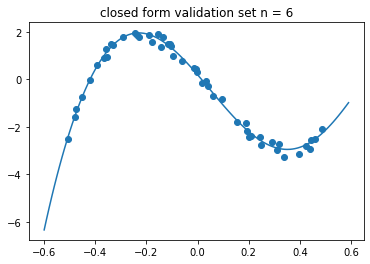

The total number of iterations is: 20267 with rho = 0.01
theta transpose = 
 [[-11.83644212  -8.47899581  45.32814728  -2.88073653  12.45175506
   -0.83423835   0.19097792]]
training error: 0.022148992436671622
testing error: 0.021346124694965475
validation error: 0.020646944108226963


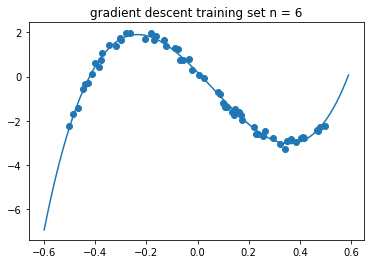

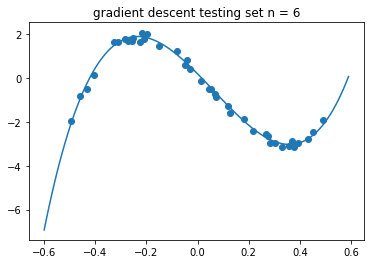

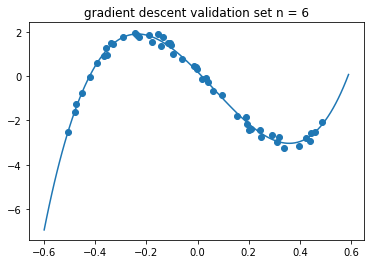

n = 7
closed form calculation:
theta transpose = 
 [[ -12.25785305   -8.38412025   47.61233034    0.73269826   51.86967032
   -19.93113349 -186.010816      0.18685613]]
training error: 0.01909142906254683
testing error: 0.024610785135255334
validation error: 0.02357587837113374
gradient descent calculation:


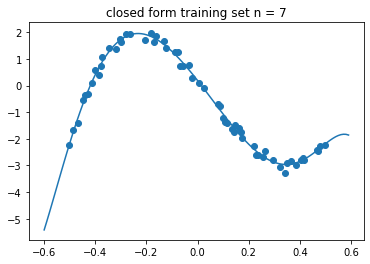

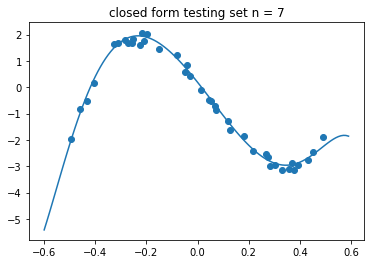

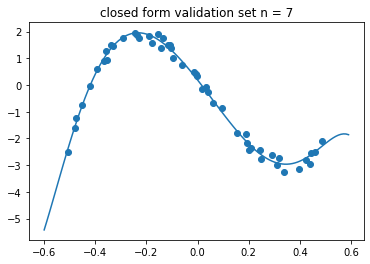

The total number of iterations is: 20296 with rho = 0.01
theta transpose = 
 [[-11.82252296  -8.47918498  45.14477485  -2.8781996   12.37587962
   -0.8328884    2.93703047   0.1908212 ]]
training error: 0.022311863655765454
testing error: 0.02136065366725485
validation error: 0.02066374306332135


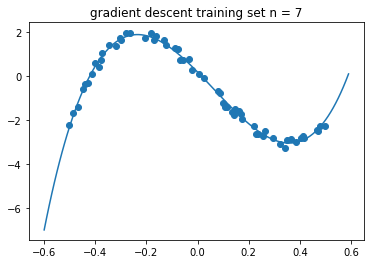

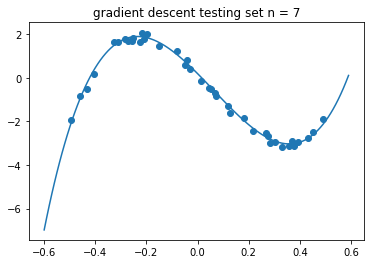

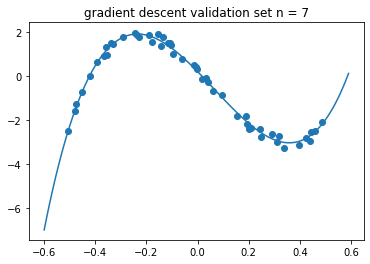

n = 8
closed form calculation:
theta transpose = 
 [[-1.22694433e+01 -6.69508834e+00  4.75081908e+01 -3.43952577e+01
   5.47390270e+01  2.14392389e+02 -1.95803480e+02 -4.85851954e+02
   1.73402280e-01]]
training error: 0.01899639050145581
testing error: 0.024677641205988518
validation error: 0.023989476010846444
gradient descent calculation:


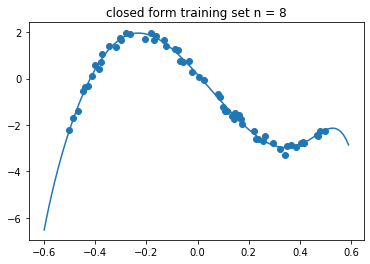

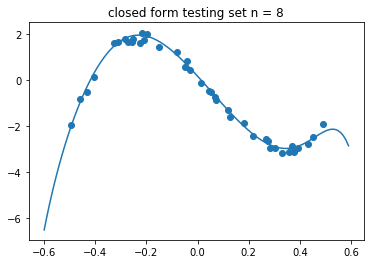

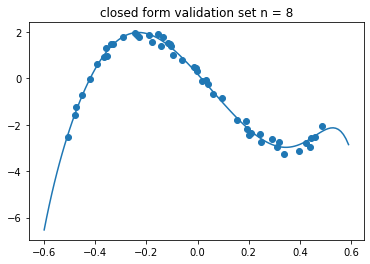

The total number of iterations is: 20295 with rho = 0.01
theta transpose = 
 [[-11.82248277  -8.47800177  45.1446007   -2.87350803  12.37580144
   -0.83114268   2.9369994   -0.2204574    0.19076032]]
training error: 0.022309447358048344
testing error: 0.021365508868171193
validation error: 0.02066866885957911


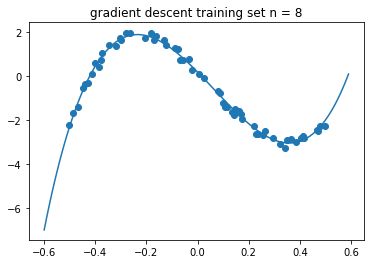

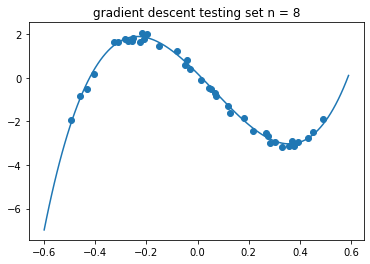

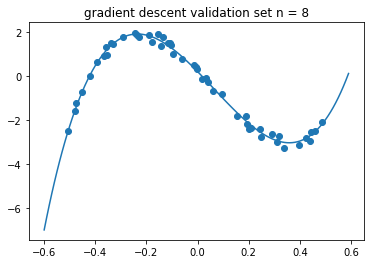

n = 9
closed form calculation:
theta transpose = 
 [[-1.25671204e+01 -6.71433985e+00  6.54524431e+01 -3.49860781e+01
  -2.20471901e+02  2.24320559e+02  1.34254220e+03 -5.17284840e+02
  -2.83956347e+03  1.73118268e-01]]
training error: 0.018773858488098934
testing error: 0.023492192421502682
validation error: 0.024297375512569865
gradient descent calculation:


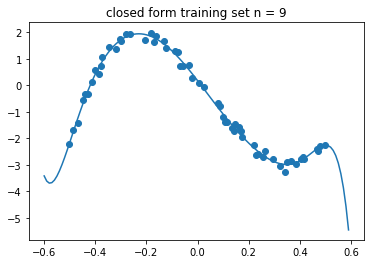

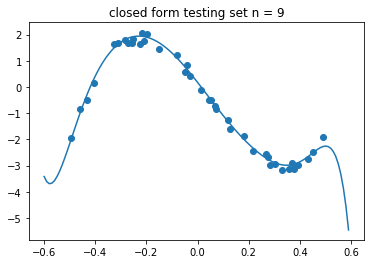

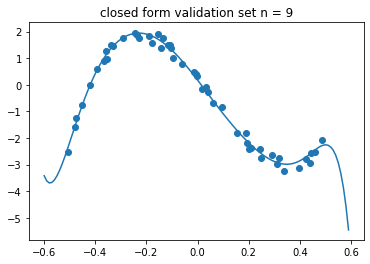

The total number of iterations is: 20302 with rho = 0.01
theta transpose = 
 [[-11.82166428  -8.47798776  45.13502866  -2.87346579  12.37116392
   -0.83109706   2.935505    -0.22043443   0.67700636   0.19074935]]
training error: 0.022321587863726105
testing error: 0.02136682148654185
validation error: 0.020669728304869826


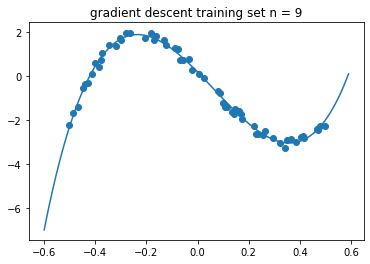

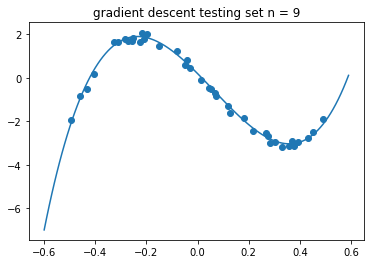

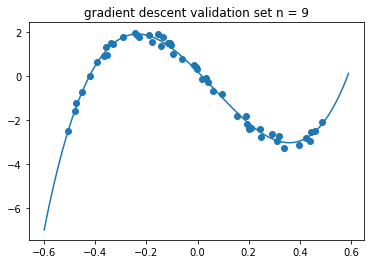

In [12]:
d1 = sio.loadmat('./data/dataset_hw2.mat')
d1.pop('__header__')
d1.pop('__version__')
d1.pop('__globals__')
data = feature_normalization(d1)

closed_trn_err_list = []
closed_tst_err_list = []
closed_val_err_list = []
gd_trn_err_list = []
gd_tst_err_list = []
gd_val_err_list = []

for n in range(1, 10):
    print('n = {}'.format(n))
    print("closed form calculation:")
    data_copy, theta_star, err_trn, err_tst, err_val = linear_reg(d1, 0, n_degree=n)
    closed_trn_err_list.append(err_trn)
    closed_tst_err_list.append(err_tst)
    closed_val_err_list.append(err_val)
    print("theta transpose = \n {}".format(theta_star.transpose()))
    print("training error: {}".format(err_trn))
    print("testing error: {}".format(err_tst))
    print("validation error: {}".format(err_val))
    print("gradient descent calculation:")
    plot_regression({"x": data_copy['X_trn'], "y": data_copy["Y_trn"]}, theta_star, title="closed form training set")
    plot_regression({"x": data_copy['X_tst'], "y": data_copy["Y_tst"]}, theta_star, title="closed form testing set")
    plot_regression({"x": data_copy['X_val'], "y": data_copy["Y_val"]}, theta_star, title="closed form validation set")

    data_copy, theta_star, err_trn, err_tst, err_val = linear_reg(d1, 1, n_degree=n)
    gd_trn_err_list.append(err_trn)
    gd_tst_err_list.append(err_tst)
    gd_val_err_list.append(err_val)
    print("theta transpose = \n {}".format(theta_star.transpose()))
    print("training error: {}".format(err_trn))
    print("testing error: {}".format(err_tst))
    print("validation error: {}".format(err_val))
    plot_regression({"x": data_copy['X_trn'], "y": data_copy["Y_trn"]}, theta_star, title="gradient descent training set")
    plot_regression({"x": data_copy['X_tst'], "y": data_copy["Y_tst"]}, theta_star, title="gradient descent testing set")
    plot_regression({"x": data_copy['X_val'], "y": data_copy["Y_val"]}, theta_star, title="gradient descent validation set")

### errors change as a function of n

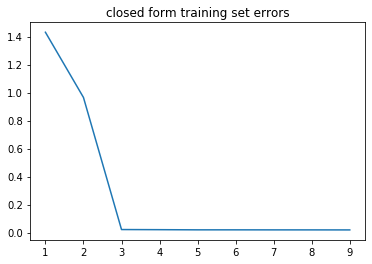

In [13]:
plt.plot(np.arange(1, 10, 1), closed_trn_err_list)
plt.title("closed form training set errors")
plt.show()

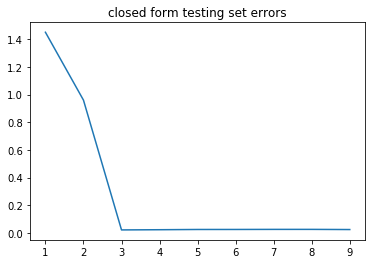

In [14]:
plt.plot(np.arange(1, 10, 1), closed_tst_err_list)
plt.title("closed form testing set errors")
plt.show()

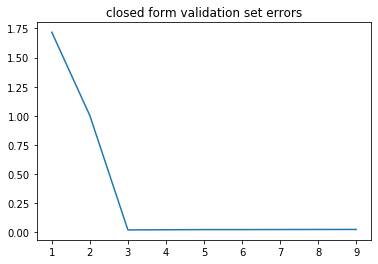

In [15]:
plt.plot(np.arange(1, 10, 1), closed_val_err_list)
plt.title("closed form validation set errors")
plt.show()

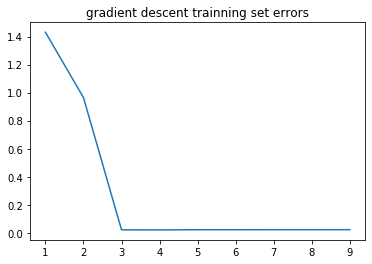

In [16]:
plt.plot(np.arange(1, 10, 1), gd_trn_err_list)
plt.title("gradient descent trainning set errors")
plt.show()

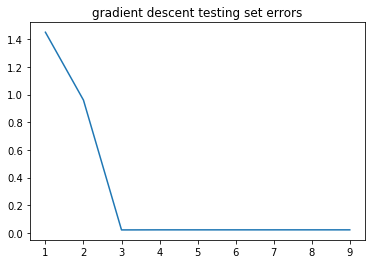

In [18]:
plt.plot(np.arange(1, 10, 1), gd_tst_err_list)
plt.title("gradient descent testing set errors")
plt.show()

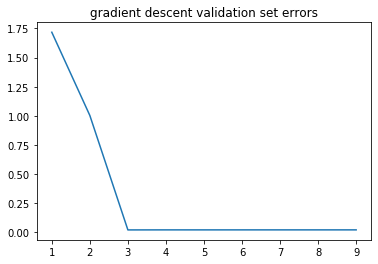

In [19]:
plt.plot(np.arange(1, 10, 1), gd_val_err_list)
plt.title("gradient descent validation set errors")
plt.show()

### problem c is on another notebook: q7c.ipynb